In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = [15,8]
from sklearn import metrics
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv('diabetic_data.csv')
print(data.shape)

(101766, 50)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [4]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
data2 = data[['readmitted']].join(data.iloc[:,10:22])
data2.columns

Index(['readmitted', 'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses'],
      dtype='object')

In [6]:
data2.dtypes

readmitted            object
payer_code            object
medical_specialty     object
num_lab_procedures     int64
num_procedures         int64
num_medications        int64
number_outpatient      int64
number_emergency       int64
number_inpatient       int64
diag_1                object
diag_2                object
diag_3                object
number_diagnoses       int64
dtype: object

In [7]:
data2.head(20)

,readmitted,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses
0,NO,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1
1,>30,?,?,59,0,18,0,0,0,276,250.01,255,9
2,NO,?,?,11,5,13,2,0,1,648,250,V27,6
3,NO,?,?,44,1,16,0,0,0,8,250.43,403,7
4,NO,?,?,51,0,8,0,0,0,197,157,250,5
5,>30,?,?,31,6,16,0,0,0,414,411,250,9
6,NO,?,?,70,1,21,0,0,0,414,411,V45,7
7,>30,?,?,73,0,12,0,0,0,428,492,250,8
8,NO,?,?,68,2,28,0,0,0,398,427,38,8
9,NO,?,InternalMedicine,33,3,18,0,0,0,434,198,486,8


# Target Distribution

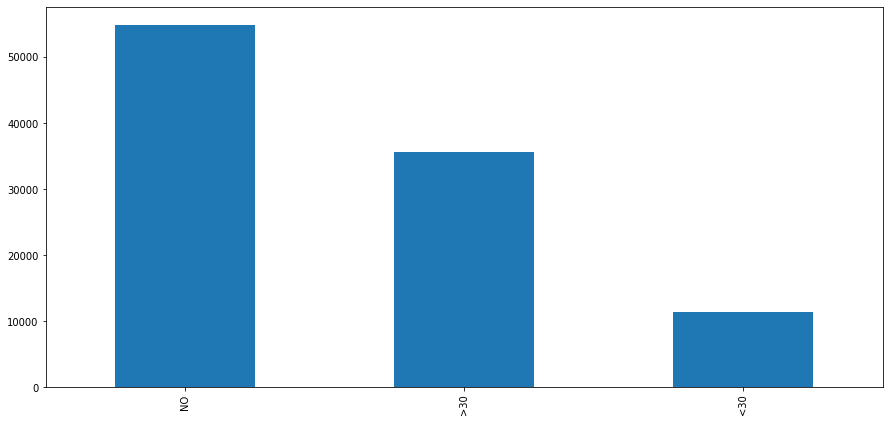

In [8]:
data2.readmitted.value_counts().plot(kind='bar',figsize=(15,7))
plt.show()

### Unique Values Present:

In [9]:
for i in data2.columns:
    print('{} :: {}\n'.format(i,data2[i].unique()))

readmitted :: ['NO' '>30' '<30']

payer_code :: ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']

medical_specialty :: ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psychiatry-Child/Adolescent'
 'Pediatrics-Pulmonology' 'Neurology' 'Anesthesiology-Pediatric'
 'Radiology' 'Pediatrics-Hematology-Oncology' 'Psychology' 'Podiatry'
 'Gynecology' 'Oncology' 'Pediatrics-Neurology' 'Surgery-Plastic'
 'Surgery-Thoracic' 'Surgery-PlasticwithinHeadandNeck' 'Ophthalmology'
 'Surgery-Pediatric' 'Pediatrics-EmergencyMedicine'
 'Physi

# Value Changes

In [10]:
data2.payer_code.replace('?',np.nan,inplace=True)
data2.medical_specialty.replace('?',np.nan,inplace=True)
data2.diag_2.replace('?',np.nan,inplace=True)
data2.diag_3.replace('?',np.nan,inplace=True)

# Tight Layout Display

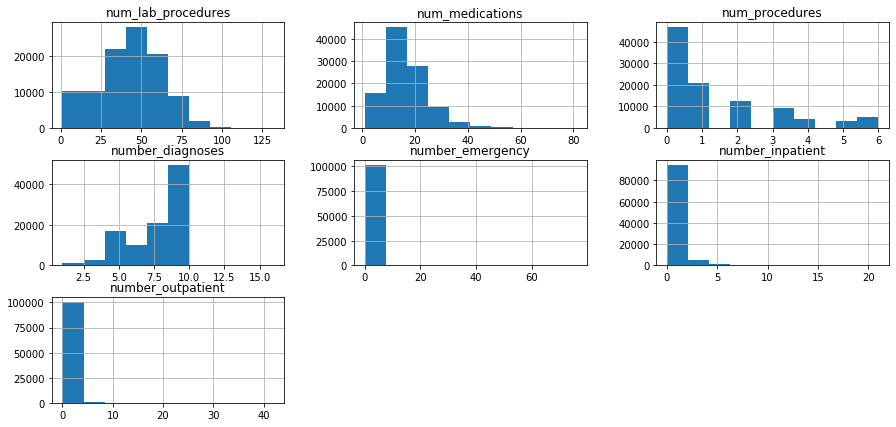

In [11]:
data2.hist(figsize=(15,7))
plt.show()

In [12]:
cat_cols = data2.select_dtypes('object').columns
num_cols = data2.select_dtypes(np.number).columns

# Univariate Analysis

## Numerical Columns Distribution Check

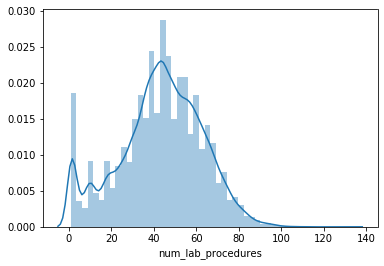

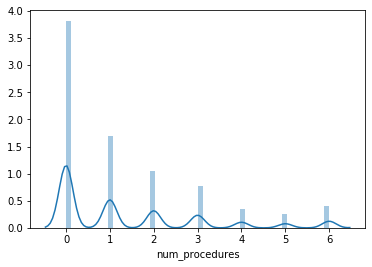

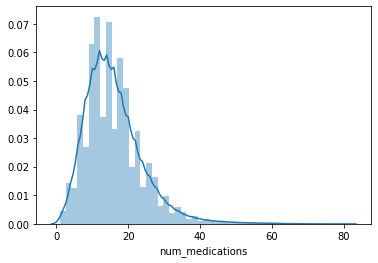

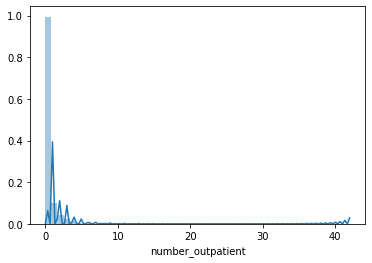

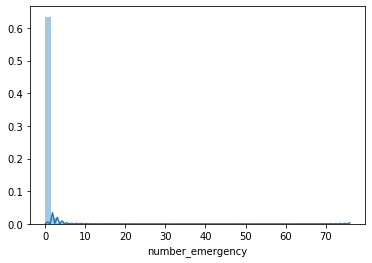

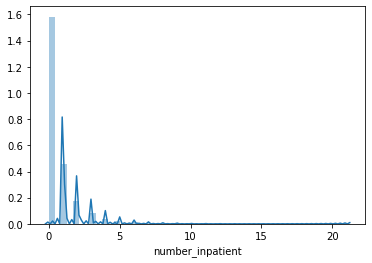

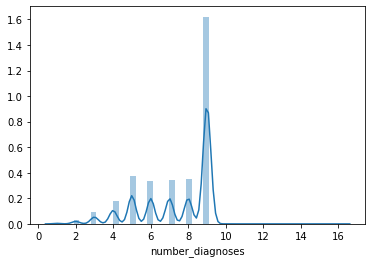

In [13]:
for i in num_cols:
    sns.distplot(data2[i])
    plt.show()
    

We can see that there are Lot of Outliers here:
    * num_lab_procedures
    * num_medications
    * number_outpatient
    * number_emergency
    * number_inpatient
    * number_diagnoses

## Categorical Columns Distribution Check

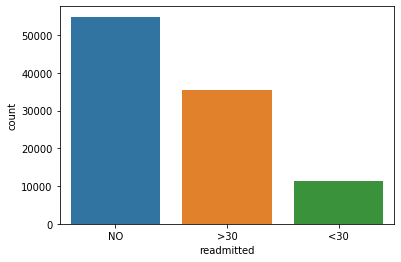

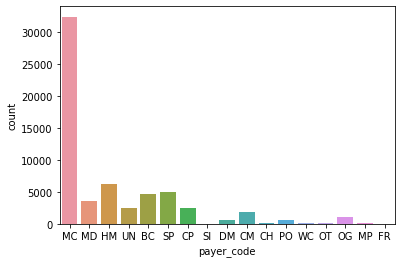

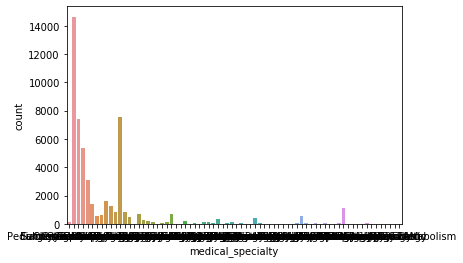

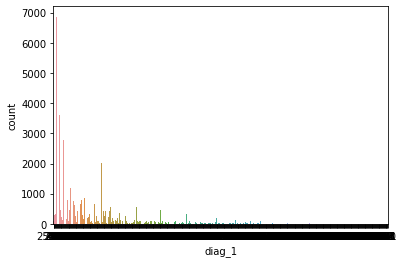

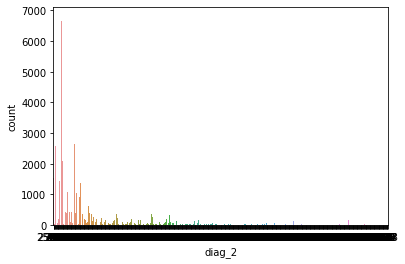

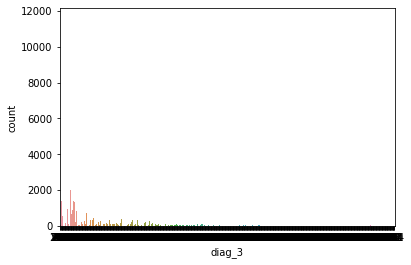

In [14]:
for i in cat_cols:
    sns.countplot(data2[i])
    plt.show()
    
# cat_cols

* We can see that there are Extremely Large Number of Categories in diag1,diag2,diag3 approx(700 in each that too Nominal Categories)

# BiVariate Analysis

### Numerical Columns v/s Target

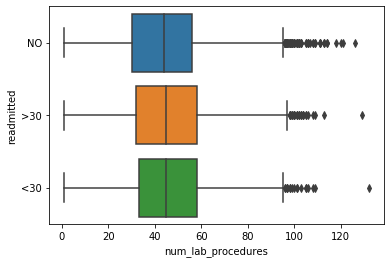

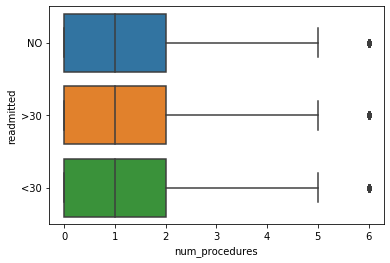

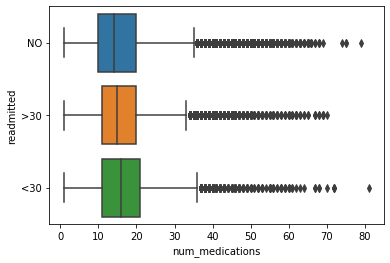

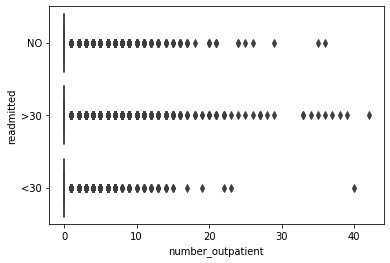

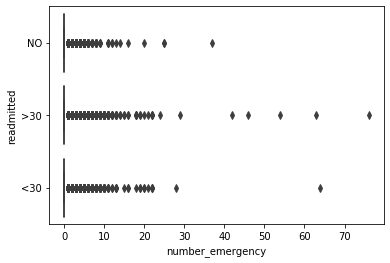

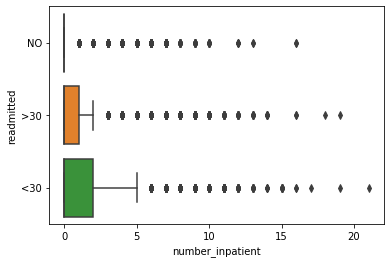

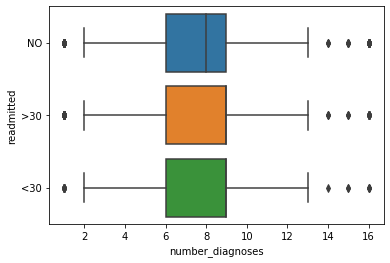

In [15]:
for i in num_cols:
    sns.boxplot(data2[i],data2.readmitted)
    plt.show()

* Those patients who have undergone higher Lab_Procedures have lesser chance of re-admission

### Categorical Columns v/s Target

readmitted   <30    >30     NO
payer_code                    
BC           426   1301   2928
CH            13     33    100
CM           198    661   1078
CP           214    781   1538
DM            64    220    265
FR             0      0      1
HM           644   2320   3310
MC          3810  11982  16647
MD           416   1259   1857
MP             9     39     31
OG           136    333    564
OT             7     38     50
PO            44    144    404
SI             7     17     31
SP           510   1869   2628
UN           227    696   1525
WC             5     24    106 




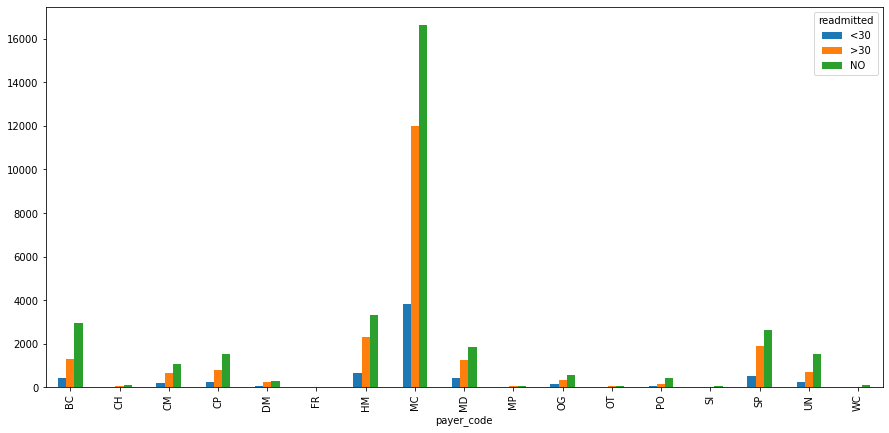

readmitted                        <30   >30    NO
medical_specialty                                
AllergyandImmunology                3     3     1
Anesthesiology                      1     3     8
Anesthesiology-Pediatric            1     5    13
Cardiology                        425  1853  3074
Cardiology-Pediatric                1     4     2
...                               ...   ...   ...
Surgery-PlasticwithinHeadandNeck    0     1     0
Surgery-Thoracic                   11    30    68
Surgery-Vascular                   74   200   259
SurgicalSpecialty                   2     9    22
Urology                            68   185   432

[72 rows x 3 columns] 




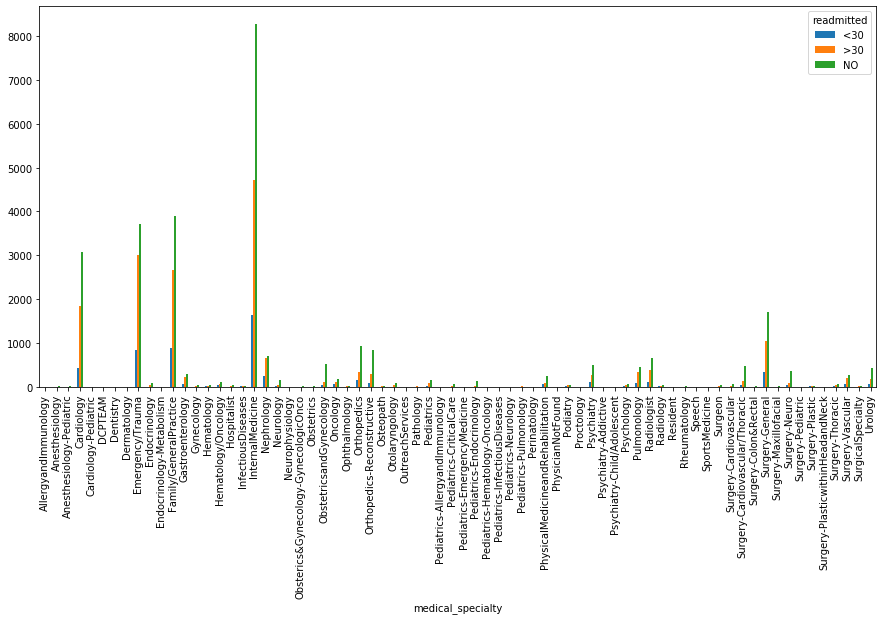

readmitted  <30  >30  NO
diag_1                  
10            0    0   1
11            0    3   7
110           0    1   1
112          14   26  33
114           0    1   0
...         ...  ...  ..
V63           1    1   6
V66           0    0   2
V67           0    1   0
V70           0    0   1
V71           0    2   7

[717 rows x 3 columns] 




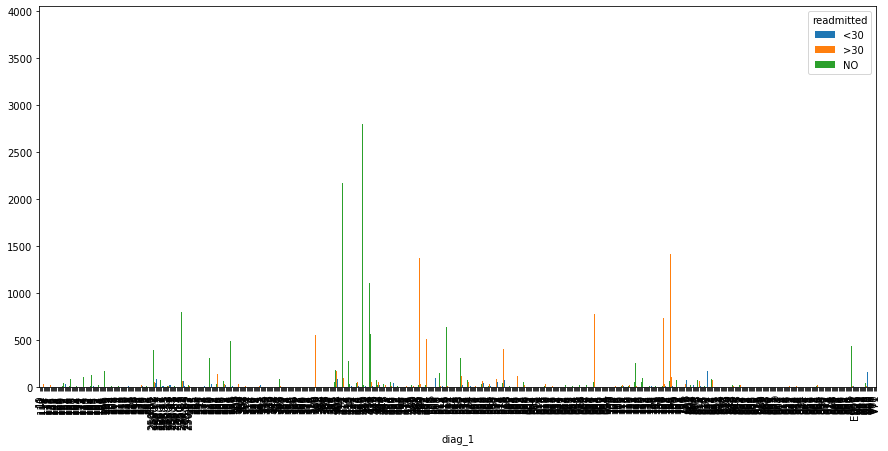

readmitted  <30  >30   NO
diag_2                   
11            1    1    1
110           2    3    3
111           0    0    1
112          28   75   98
114           1    0    0
...         ...  ...  ...
V69           0    0    1
V70           0    3    4
V72           0    1   12
V85          22   36  111
V86           0    1    1

[748 rows x 3 columns] 




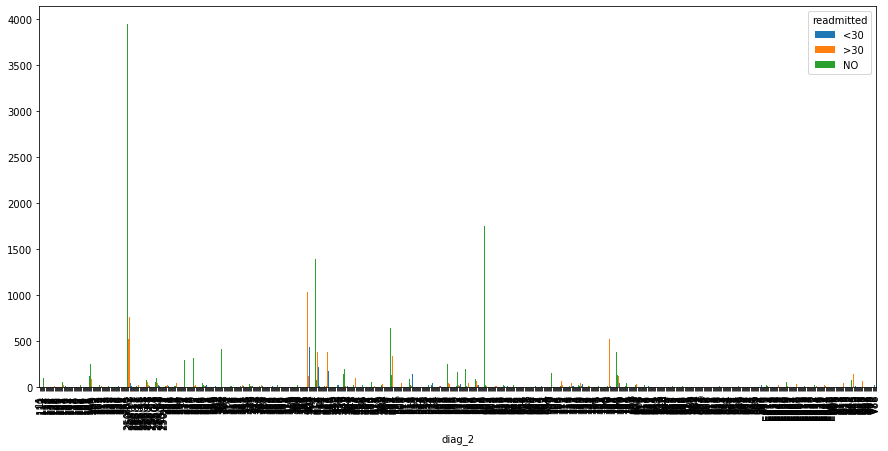

readmitted  <30  >30   NO
diag_3                   
11            1    0    1
110           2    6   12
111           1    0    0
112          22   73  111
115           0    0    1
...         ...  ...  ...
V66           1    3   14
V70           0    0    2
V72           1    1    6
V85           9   22   65
V86           0    1    2

[789 rows x 3 columns] 




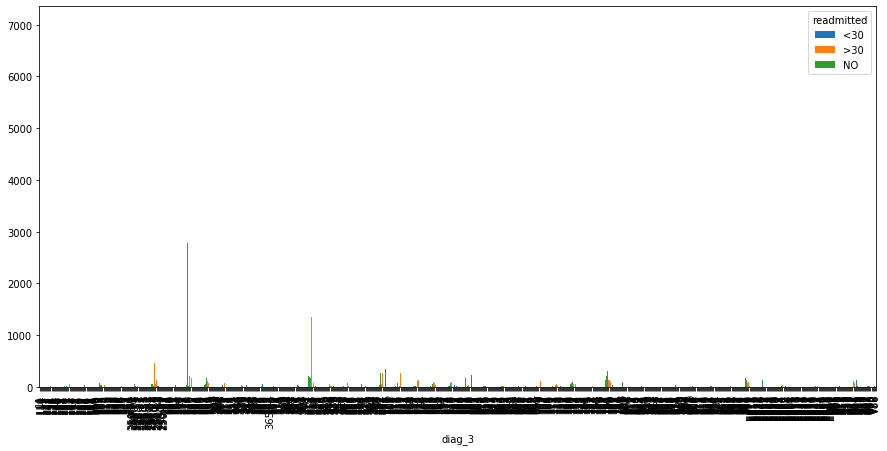

In [16]:
for i in cat_cols[1:]:
    print(pd.crosstab(data2[i],data2.readmitted),'\n\n')
    pd.crosstab(data2[i],data2.readmitted).plot(kind='bar',figsize=(15,7))
    plt.show()

* Can't conclude to any inference for the diag1,diag2 and diag3 columns
* MC payer_code has higher occurences out of all others

# Null Values Check

In [17]:
(data2.isnull().sum()/data2.shape[0]*100).sort_values(ascending=False)

medical_specialty     49.082208
payer_code            39.557416
diag_3                 1.398306
diag_2                 0.351787
number_diagnoses       0.000000
diag_1                 0.000000
number_inpatient       0.000000
number_emergency       0.000000
number_outpatient      0.000000
num_medications        0.000000
num_procedures         0.000000
num_lab_procedures     0.000000
readmitted             0.000000
dtype: float64

In [18]:
data2.medical_specialty.value_counts()

InternalMedicine                    14635
Emergency/Trauma                     7565
Family/GeneralPractice               7440
Cardiology                           5352
Surgery-General                      3099
                                    ...  
Dermatology                             1
Surgery-PlasticwithinHeadandNeck        1
SportsMedicine                          1
Perinatology                            1
Pediatrics-InfectiousDiseases           1
Name: medical_specialty, Length: 72, dtype: int64

In [19]:
data2.payer_code.value_counts()

MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

### Medical_Speciality and Payer Code have higher Missing Values
    --Lets see how we can handle them!!

In [20]:
pd.set_option('max_rows',75)

In [21]:
data2.medical_specialty.value_counts()

InternalMedicine                        14635
Emergency/Trauma                         7565
Family/GeneralPractice                   7440
Cardiology                               5352
Surgery-General                          3099
Nephrology                               1613
Orthopedics                              1400
Orthopedics-Reconstructive               1233
Radiologist                              1140
Pulmonology                               871
Psychiatry                                854
Urology                                   685
ObstetricsandGynecology                   671
Surgery-Cardiovascular/Thoracic           652
Gastroenterology                          564
Surgery-Vascular                          533
Surgery-Neuro                             468
PhysicalMedicineandRehabilitation         391
Oncology                                  348
Pediatrics                                254
Hematology/Oncology                       207
Neurology                         

In [22]:
data2[data2.medical_specialty.isnull()]

,readmitted,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses
1,>30,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9
2,NO,NaN,NaN,11,5,13,2,0,1,648,250,V27,6
3,NO,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7
4,NO,NaN,NaN,51,0,8,0,0,0,197,157,250,5
5,>30,NaN,NaN,31,6,16,0,0,0,414,411,250,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,>30,DM,NaN,45,1,25,3,1,2,345,438,412,9
101761,>30,MC,NaN,51,0,16,0,0,0,250.13,291,458,9
101762,NO,MC,NaN,33,3,18,0,0,1,560,276,787,9
101763,NO,MC,NaN,53,0,9,1,0,0,38,590,296,13


In [23]:
data2.diag_1.unique()

array(['250.83', '276', '648', '8', '197', '414', '428', '398', '434',
       '250.7', '157', '518', '999', '410', '682', '402', '737', '572',
       'V57', '189', '786', '427', '996', '277', '584', '462', '473',
       '411', '174', '486', '998', '511', '432', '626', '295', '196',
       '250.6', '618', '182', '845', '423', '808', '250.4', '722', '403',
       '250.11', '784', '707', '440', '151', '715', '997', '198', '564',
       '812', '38', '590', '556', '578', '250.32', '433', 'V58', '569',
       '185', '536', '255', '250.13', '599', '558', '574', '491', '560',
       '244', '250.03', '577', '730', '188', '824', '250.8', '332', '562',
       '291', '296', '510', '401', '263', '438', '70', '250.02', '493',
       '642', '625', '571', '738', '593', '250.42', '807', '456', '446',
       '575', '250.41', '820', '515', '780', '250.22', '995', '235',
       '250.82', '721', '787', '162', '724', '282', '514', 'V55', '281',
       '250.33', '530', '466', '435', '250.12', 'V53', '789', '

Group name      icd9 codes
Circulatory     390–459, 785
Respiratory     460–519, 786
Digestive       520–579, 787
Diabetes        250.xx
Injury          800–999
Musculoskeletal 710–739
Genitourinary   580–629
Neoplasms       140–239,780, 781, 784, 790–799
                240–279, without 250
                680–709, 782
                001–139
                290–319
Other:          E–V
                280–289
                320–359
                630–679
                360–389
                740–759

Circulatory        30437
Respiratory        14423
Neoplasm           13887
Digestive           9475
Diabetic            8757
Others              7778
Injury              6974
Genitourinary       5078
Musculoskeletal     4957
Name: diag1_kind, dtype: int64


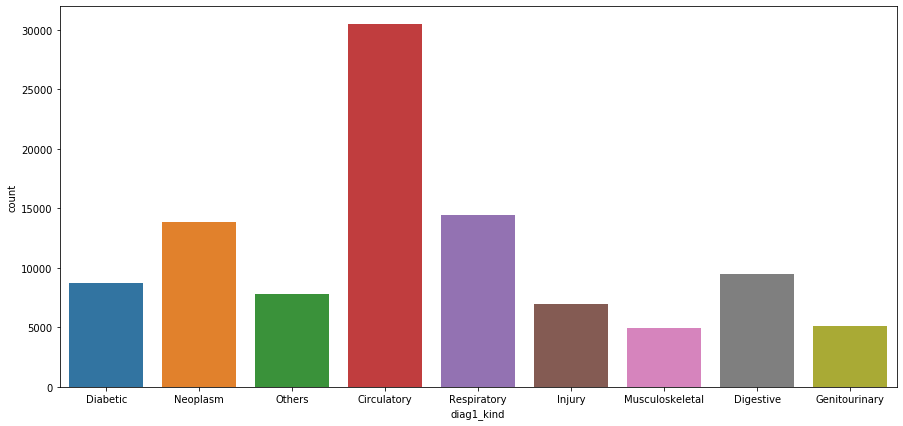

In [47]:
icd_circulatory = list(range(390,460))
icd_circulatory.append(785)
icd_circulatory = list(map(str,icd_circulatory))

icd_respiratory = list(range(460,520))
icd_respiratory.append(786)
icd_respiratory = list(map(str,icd_respiratory))

icd_digestive = list(range(520,580))
icd_digestive.append(787)
icd_digestive = list(map(str,icd_digestive))

icd_injury = list(range(800,1000))
icd_injury = list(map(str,icd_injury))

icd_musculoskeletal = list(range(710,740))
icd_musculoskeletal = list(map(str,icd_musculoskeletal))

icd_genitourinary = list(range(580,630))
icd_genitourinary = list(map(str,icd_genitourinary))

icd_neoplasms = list(range(1,280))
icd_neoplasms.extend(range(680,710))
icd_neoplasms.extend(range(290,320))
icd_neoplasms.extend(range(790,799))
icd_neoplasms.append(range(780,785))
icd_neoplasms.remove(250)
icd_neoplasms = list(map(str,icd_neoplasms))
# icd_neoplasms.remove(783)

def diabetic_check(x):
    if str(x) == np.nan:
        return np.nan
    elif str(x)[:3] == '250':
        return 'Diabetic'
    elif x in icd_circulatory:
        return 'Circulatory'
    elif x in icd_respiratory:
        return 'Respiratory'
    elif x in icd_digestive:
        return 'Digestive'
    elif x in icd_injury:
        return 'Injury'
    elif x in icd_musculoskeletal:
        return 'Musculoskeletal'
    elif x in icd_genitourinary:
        return 'Genitourinary'
    elif x in icd_neoplasms:
        return 'Neoplasm'
    else:
        return 'Others'

data2['diag1_kind'] = data2.diag_1.apply(diabetic_check)
print(data2['diag1_kind'].value_counts())

plt.figure(figsize=(15,7))
sns.countplot(data2.diag1_kind)
plt.show()

Circulatory        31881
Neoplasm           19274
Diabetic           12794
Respiratory        10895
Others             10573
Genitourinary       7987
Digestive           4170
Injury              2428
Musculoskeletal     1764
Name: diag2_kind, dtype: int64


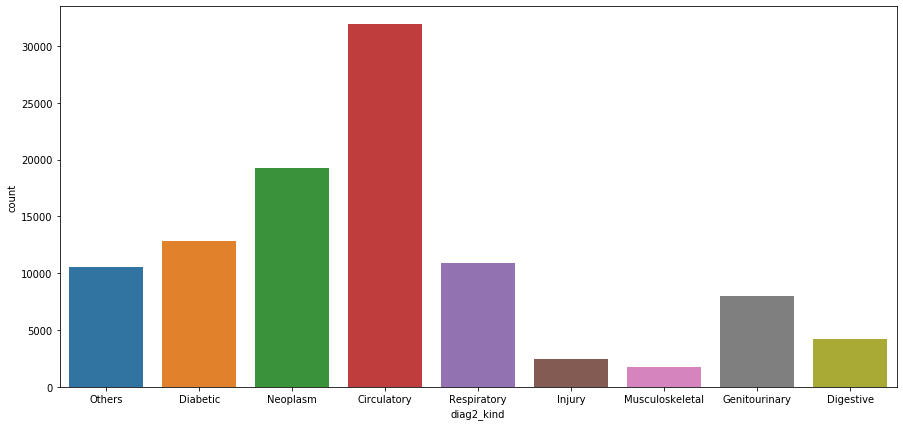

In [48]:
data2['diag2_kind'] = data2.diag_2.apply(diabetic_check)
print(data2['diag2_kind'].value_counts())

plt.figure(figsize=(15,7))
sns.countplot(data2.diag2_kind)
plt.show()

Circulatory        30306
Neoplasm           18851
Diabetic           17157
Others             13976
Respiratory         7358
Genitourinary       6327
Digestive           3930
Injury              1946
Musculoskeletal     1915
Name: diag3_kind, dtype: int64


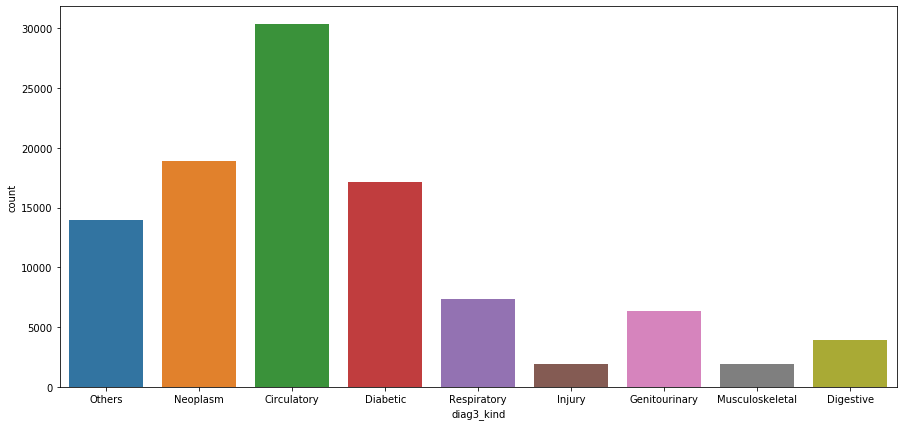

In [49]:
data2['diag3_kind'] = data2.diag_3.apply(diabetic_check)
print(data2['diag3_kind'].value_counts())

plt.figure(figsize=(15,7))
sns.countplot(data2.diag3_kind)
plt.show()

In [27]:
def diabetes_complications(x):
    if x == np.nan:
        return np.nan
    elif x[:3]=='250':
        temp = np.split(x,'.')[1]
        print(x)
#         if temp == '0':
#             return 'no complication'
#         elif temp == '1':
#             return 'ketoacidosis'
#         elif temp == '2':
#             return 'hypersmolarity'
#         elif temp == '3':
#             return 'other coma'
#         elif temp == '4':
#             return 'renal manifestation'
#         elif temp == '5':
#             return 'opthalmic manifestation'
#         elif temp == '6':
#             return 'neurological manifestation'
#         elif temp == '7':
#             return 'peripheral circulatory disorders'
#         elif temp == '8':
#             return 'other manifestation'
#         elif temp == '9':
#             return 'unspecified complication'
#         else:
#             return y
    else:
        return 'none'
    
# data2['diag1_complication'] = 
data2['diag_1'].apply(diabetes_complications)

AxisError: axis1: axis 0 is out of bounds for array of dimension 0